In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [14]:
#Logistic regression implementation
def sig(x):
    return 1.0/(1+np.exp(-x))

def calc_gradient(X, y, y_hat, m):
    grad = (1/m)*np.dot(X.T, (y_hat - y))   
    return grad


def cost_func(y, y_hat, m):
    cost = (-1/m) * np.sum((y * np.log(y_hat)) + (1 - y) * np.log(1 - y_hat))
    return cost

def fit_log_reg(X, y, itr, lr):
    m,n = X.shape
    theta = np.zeros((n,1))
    cost_list = []
    
    for i in range(itr):
        y_hat = sig(np.dot(X, theta))
        grad = calc_gradient(X, y, y_hat, m)
        theta = theta - ( lr * grad)
        #print(theta.shape)
        cost = cost_func(y, sig(np.dot(X, theta)), m)
        cost_list.append(cost)
    return theta, cost_list
        
def predict(X, theta):
    predictions = sigmoid(np.dot(X, theta))
    print(predictions).shape
    labels = []
              
    for pred in predictions:
        if pred >= 0.5:
            labels.append(1)
        else:
            labels.append(0)
            
    labels = np.asarray(labels)
    return labels

In [5]:
trainset = pd.read_csv('data/emails.csv')
traindata = np.loadtxt('data/emails.csv',delimiter=',', skiprows=1, usecols=range(1,3002))
EX_train = traindata[:, :3000]  
Ey_train = traindata[:,3000]

#print(EX_train.shape, Ey_train.shape)

KeyboardInterrupt: 

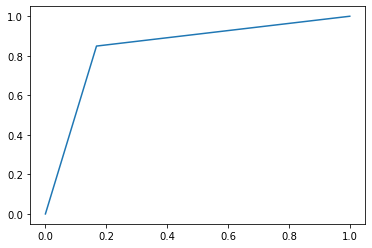

In [15]:
# using first fold
i = 0
X_test  = EX_train[i*1000:(i+1)*1000]
y_test  = Ey_train[i*1000:(i+1)*1000] 
indices = np.arange(i*1000, (i+1)*1000, 1, dtype=int)
X_train = np.delete(EX_train, indices, axis=0)
y_train = np.delete(Ey_train, indices, axis=0)

# get knn classifier
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)
predictions_knn = clf.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_knn)
auc = metrics.roc_auc_score(y_test, predictions_knn)

#create ROC curve
plt.plot(fpr,tpr,label="KNN(N=5) AUC="+str(auc))


# get logistic regression classifer
theta,cost_list = fit_log_reg(X_train, y_train, 10000, 0.01)
# Make predictions
predictions = predict(X_test, theta)
#fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
#auc = metrics.roc_auc_score(y_test, predictions)
#plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.legend()
#plt.show()